In [2]:
from Functions.fn_basic import *
from Functions.fn_stats import *
from Functions.fn_plots import *

import os, mne
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

exp_folder_1 = r"Eyes Closed\Baseline"
exp_folder_2 = r"Eyes Closed\6 weeks"
exp_folder_3 = r"Eyes Closed\10 weeks"

# exp_folder_1 = r"Eyes Open\Baseline"
# exp_folder_2 = r"Eyes Open\6 weeks"
# exp_folder_3 = r"Eyes Open\10 weeks"

psd_reg_folder = r"Results\PSD\regions"
psd_ch_folder = r"Results\PSD\channels"

psd_faa_folder = r"Results\PSD"
[dir_inprogress_faa,filenames_faa,condition_faa] = read_excel_psd('',psd_faa_folder)

condition_code_list = [['EC_00','EC_06'],['EC_06','EC_07'],['EC_00','EC_07']]
#condition_code_list = [['EO_00','EO_06'],['EO_06','EO_07'],['EO_00','EO_07']]
stat_test = 'Wilcoxon'

[dir_inprogress_reg_1,b_names_reg_1,condition_reg_1] = read_excel_psd(exp_folder_1,psd_reg_folder)
[dir_inprogress_reg_2,b_names_reg_2,condition_reg_2] = read_excel_psd(exp_folder_2,psd_reg_folder)
[dir_inprogress_reg_3,b_names_reg_3,condition_reg_3] = read_excel_psd(exp_folder_3,psd_reg_folder)

dir_inprogress_reg = dir_inprogress_reg_1,dir_inprogress_reg_2,dir_inprogress_reg_3
b_names_reg = b_names_reg_1,b_names_reg_2,b_names_reg_3
condition_reg = condition_reg_1,condition_reg_2,condition_reg_3

[dir_inprogress_ch_1,b_names_ch_1,condition_ch_1] = read_excel_psd(exp_folder_1,psd_ch_folder)
[dir_inprogress_ch_2,b_names_ch_2,condition_ch_2] = read_excel_psd(exp_folder_2,psd_ch_folder)
[dir_inprogress_ch_3,b_names_ch_3,condition_ch_3] = read_excel_psd(exp_folder_3,psd_ch_folder)

dir_inprogress_ch = dir_inprogress_ch_1,dir_inprogress_ch_2,dir_inprogress_ch_3
b_names_ch = b_names_ch_1,b_names_ch_2,b_names_ch_3
condition_ch = condition_ch_1,condition_ch_2,condition_ch_3

clean_folder = r"Data\Clean"
dir_inprogress_epo = os.path.join(clean_folder,exp_folder_1)
_, subject_names = read_files(dir_inprogress_epo,"_clean-epo.fif")
epochs = mne.read_epochs(fname='{}\{}_clean-epo.fif'.format(dir_inprogress_epo,subject_names[0]),verbose=False)

Files in folder: 6
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 26


No significance found.


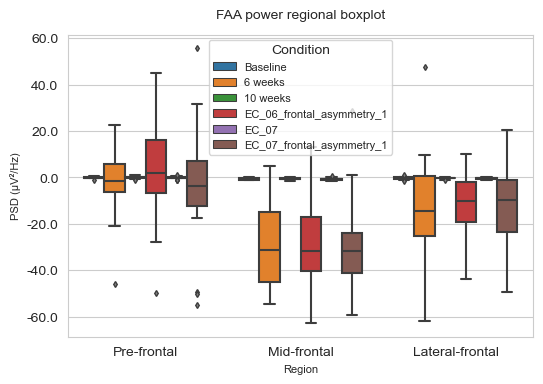

In [3]:
df_faa = pd.DataFrame()
for i in range(len(filenames_faa)):
    df_faa_temp = pd.read_excel('{}\{}.xlsx'.format(dir_inprogress_faa,filenames_faa[i]))\
        .assign(**{'Frequency band':'FAA','Condition': condition_faa[i][0].removesuffix('_frontal_asymmetry')})
    df_faa = pd.concat([df_faa,df_faa_temp])
#display(df_faa)
#print('EC_00 mean\n',df_faa[['Pre-frontal','Mid-frontal','Lateral-frontal']][df_faa['Condition']=='EC_00'].mean())
#print('EC_06 mean\n',df_faa[['Pre-frontal','Mid-frontal','Lateral-frontal']][df_faa['Condition']=='EC_06'].mean())
#print('EC_07 mean\n',df_faa[['Pre-frontal','Mid-frontal','Lateral-frontal']][df_faa['Condition']=='EC_07'].mean())

plot_boxplot_band(df_faa,regions=['Pre-frontal','Mid-frontal','Lateral-frontal'],
                  band='FAA',condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=True,stat_test='Wilcoxon',ast_loc='inside',export=False)

N1 = 4
M1 = 2.5
SD1 = 1.8027756377319946
SEM1 = 0.9013878188659973

N2 = 4
M2 = 1.75
SD2 = 0.82915619758885
SEM2 = 0.414578098794425

M_D = 0.75
SD_D = 0.9921567416492214


,col1,col2
0,0,1
1,2,1
2,5,3
3,3,9


,col1,col2
count,4.000000,4.000000
mean,2.500000,3.500000
std,2.081666,3.785939
min,0.000000,1.000000
25%,1.500000,1.000000
50%,2.500000,2.000000
75%,3.500000,4.500000
max,5.000000,9.000000


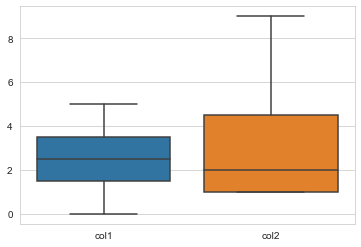

In [4]:
print('N1 =', len([0,2,5,3]))
print('M1 =',np.mean([0,2,5,3]))
print('SD1 =',np.std([0,2,5,3]))
print('SEM1 =',stats.sem([0,2,5,3],ddof=0))

print('')

print('N2 =', len([1,1,3,2]))
print('M2 =',np.mean([1,1,3,2]))
print('SD2 =',np.std([1,1,3,2]))
print('SEM2 =',stats.sem([1,1,3,2],ddof=0))

print('')

print('M_D =',np.abs(np.mean([0,2,5,3])-np.mean([1,1,3,2])))
print('SD_D =',np.sqrt(stats.sem([0,2,5,3],ddof=0)**2+stats.sem([1,1,3,2],ddof=0)**2))
# time two as well?

df = pd.DataFrame(data={'col1': [0,2,5,3], 'col2': [1,1,3,9]})
plt.figure()
sns.boxplot(data=df)
display(df)
display(df.describe())

In [5]:
df_psd_reg = pd.DataFrame()
for i in range(len(b_names_reg[0])):
    for n_exps in range(len(b_names_reg)):
        globals()[b_names_reg[n_exps][i]] = pd.read_excel('{}\{}.xlsx'\
                                            .format(dir_inprogress_reg[n_exps],b_names_reg[n_exps][i]))\
            .assign(**{'Frequency band': condition_reg[n_exps][i][1],'Condition': condition_reg[n_exps][i][0]})
        df_psd_reg = pd.concat([df_psd_reg,globals()[b_names_reg[n_exps][i]]])

for condition in condition_code_list:
    df_reg_desc,df_reg_pvals,df_reg_statistics,significant_reg = apply_stat_test(df_psd_reg,condition,stat_test=stat_test)
    try:
        os.makedirs(os.path.join(psd_reg_folder,''))
    except FileExistsError:
        pass
    with pd.ExcelWriter(r"Results\PSD\regions\{}_results_{}-{}.xlsx".format(stat_test,condition[0],condition[1])) as writer:
        df_reg_desc.to_excel(writer, sheet_name='Descripitives')
        df_reg_pvals.to_excel(writer, sheet_name='P-values')
        df_reg_statistics.to_excel(writer, sheet_name='Stat-values')

['EC_06', 'EC_07'] Significant changes of Alpha are at ['Temporal' 'Centro-parietal']
['EC_06', 'EC_07'] Significant changes of Delta are at ['Temporal']
['EC_06', 'EC_07'] Significant changes of Low-Beta are at ['Temporal' 'Occipital']
['EC_06', 'EC_07'] Significant changes of Theta are at ['Temporal' 'Occipital']
['EC_00', 'EC_07'] Significant changes of Alpha are at ['Temporal']


In [6]:
df_psd_ch = pd.DataFrame()
for i in range(len(b_names_ch[0])):
    for n_exps in range(len(b_names_ch)):
        globals()[b_names_ch[n_exps][i]] = pd.read_excel('{}\{}.xlsx'\
                                            .format(dir_inprogress_ch[n_exps],b_names_ch[n_exps][i]))\
            .assign(**{'Frequency band': condition_ch[n_exps][i][1],'Condition': condition_ch[n_exps][i][0]})
        df_psd_ch = pd.concat([df_psd_ch,globals()[b_names_ch[n_exps][i]]])

for condition in condition_code_list:
    df_ch_desc,df_ch_pvals,df_ch_statistics,significant_ch = apply_stat_test(df_psd_ch,condition,stat_test=stat_test)
    try:
        os.makedirs(os.path.join(psd_ch_folder,''))
    except FileExistsError:
        pass
    with pd.ExcelWriter(r"Results\PSD\channels\{}_results_{}-{}.xlsx".format(stat_test,condition[0],condition[1])) as writer:
        df_ch_desc.to_excel(writer, sheet_name='Descripitives')
        df_ch_pvals.to_excel(writer, sheet_name='P-values')
        df_ch_statistics.to_excel(writer, sheet_name='Stat-values')

['EC_00', 'EC_06'] Significant changes of Alpha are at ['Pz']
['EC_00', 'EC_06'] Significant changes of Low-Beta are at ['FC1' 'Pz']
['EC_06', 'EC_07'] Significant changes of Alpha are at ['FC1' 'FC5' 'T7' 'C3' 'CP5' 'P7' 'P3' 'PO3' 'PO4' 'P4' 'P8' 'CP6' 'CP2'
 'C4' 'T8' 'FC6' 'F4' 'F8']
['EC_06', 'EC_07'] Significant changes of Delta are at ['O1' 'Oz' 'O2' 'P8' 'CP6' 'T8']
['EC_06', 'EC_07'] Significant changes of High-Beta are at ['PO3' 'P4' 'FC6']
['EC_06', 'EC_07'] Significant changes of Low-Beta are at ['F7' 'PO3' 'O2' 'PO4' 'P4' 'CP6' 'FC6']
['EC_06', 'EC_07'] Significant changes of Theta are at ['P3' 'PO3' 'Oz' 'O2' 'PO4' 'P4' 'P8' 'CP6' 'T8']
['EC_00', 'EC_07'] Significant changes of Alpha are at ['T8']


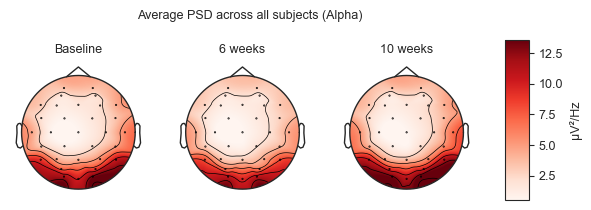

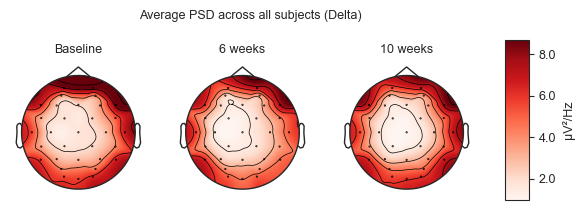

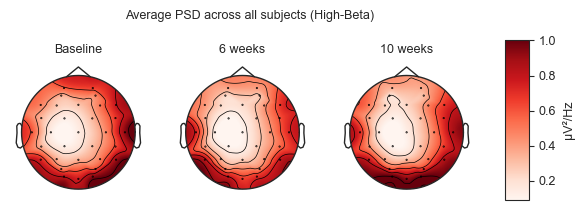

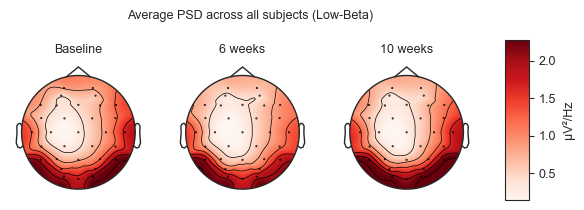

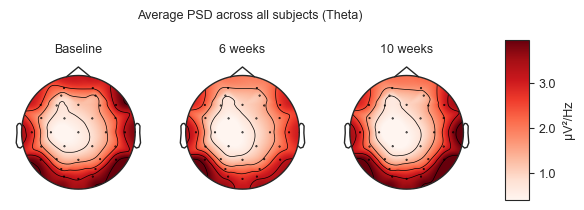

In [7]:
for b_name in (df_psd_ch['Frequency band'].unique()):
    plot_topomaps_band(df_psd_ch,epochs,b_name,condition_legend=['Baseline','6 weeks','10 weeks'],
                       conditions=['EC_00','EC_06','EC_07'],fnt=['sans-serif',9],title=True,export=True)

['EC_06', 'EC_07'] Significant changes of Low-Beta are at ['Occipital']
['EC_06', 'EC_07'] Significant changes of Theta are at ['Occipital']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Low-Beta_EC_06 vs. Low-Beta_EC_07: Wilcoxon test (paired samples), P_val:1.756e-02 Stat=8.200e+01
No significance found.


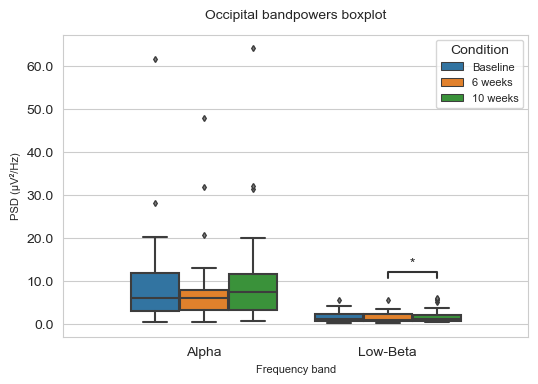

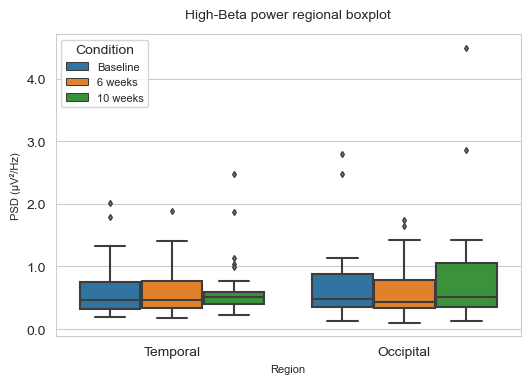

In [8]:
plot_boxplot_location(df_psd_reg,bands=['Alpha','Low-Beta'],region='Occipital',
                      condition_comp_list=condition_code_list,
                      condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                      title=True,stat_test='Wilcoxon',ast_loc='inside',export=False)

plot_boxplot_band(df_psd_reg,regions=['Temporal','Occipital'],band='High-Beta',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=True,stat_test='Wilcoxon',ast_loc='inside',export=False)

In [ ]:
# EC: Increase in alpha band power from post-treatment to follow-up in right hemisphere
plot_boxplot_band(df_psd_ch,regions=['F8','F4'],band='Alpha',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=True,stat_test='Wilcoxon',ast_loc='inside',export=True)

# EC: Increase in alpha band power from post-treatment to follow-up in right hemisphere
plot_boxplot_band(df_psd_ch,regions=['FC6','T8','C4'],band='Alpha',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=True,stat_test='Wilcoxon',ast_loc='inside',export=True)

# plot_boxplot_band(df_psd_ch,regions=['PO3','P4','FC6'],band='High-Beta',
#                   condition_comp_list=condition_code_list,
#                   condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
#                   title=True,stat_test='Wilcoxon',ast_loc='outside',export=False)

# plot_boxplot_band(df_psd_ch,regions=['PO3','P8'],band='Alpha',
#                   condition_comp_list=condition_code_list,
#                   condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
#                   title=True,stat_test='Wilcoxon',ast_loc='inside',export=False)

In [ ]:
plot_boxplot_band(df_psd_ch,regions=['F3','Fz','Cz'],band='Theta',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=True,stat_test='Wilcoxon',ast_loc='inside',export=False)

In [ ]:
# plt.figure()
# ax = sns.violinplot(x='Frequency band', y='Frontal',
#                  hue='Condition',
#                  data=df_psd_reg[df_psd_reg['Frequency band'] == 'Low-Beta'])
# ax = sns.swarmplot(x='Frequency band', y='Frontal',
#                    hue='Condition', color='0.01', dodge=True,
#                    data=df_psd_reg[df_psd_reg['Frequency band'] == 'Low-Beta'])